In [167]:
import os # join paths
from __future__ import print_function, division
import numpy as np # manipulate data
import matplotlib.pyplot as plt # plotting
import scikits.audiolab as al # play sounds, only for python 2
from scipy import signal # window signal
import ipywidgets as widgets # interactive buttons
import matplotlib # plotting parameters
matplotlib.rcParams.update({'font.size': 16}) # enlarge font size
import pyano # sounds

Settings

In [169]:
# reload(pyano)
tf = 0.6 # note duration
fs = 44100 # sampling rate
t = pyano.time_arr(tf, fs) # time
synth = pyano.harmonic_i2dec  # synthesizer, other options are sinwave, harmonic
outFigDir = '/Users/florencia/CODE/Team/prof_application/images/'

# Why do the frequencies of the musical notes follow an exponential relation?


Author: Florencia Noriega, florencia.noriega@code.berlin


## The frequencies of the musical notes

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Piano_Frequencies.svg/520px-Piano_Frequencies.svg.png style="zoom:90%">


<img src="https://upload.wikimedia.org/wikipedia/commons/8/82/CPT-sound-physical-manifestation.svg" style="zoom:20%" />


**Figure 1: Frequencies of the piano keys** 

Each note is associated with a characteristic frequency. 
Let's use the piano keys to talk about the musical notes. 
On the left side we have sounds with low frequencies and on the right side we have sounds with high frequencies. 
Starting from the left, 
the first note is $A0$ with a frequency of 27.5 Hz and 
the last note is $C8$ with a frequency is 4.2 kHz.

## Linear frequency piano

To figure out the frequencies of the rest of the notes let's define a linear function
that returns the frequencies of the piano keys assuming that the frequency grows linearly


$$
f(n) = m n + b,
$$

where $m \approx 47.8 Hz$ and $b \approx -20.3 Hz$

In [152]:
f1 = 27.5
f88 = 4186

lin_piano_ky2fr_fun = pyano.linear_piano_key2frequency_fun(1, f1, 88, f88)

Play the keys of the major scale in a **linear piano**, where the frequencies grow linearly with the key index.

In [158]:
Mscale = pyano.majorScaleKeys(1)

for i in Mscale[:-1]:
    f = lin_piano_ky2fr_fun(i)
    y = synth(f, t)
    al.play(y, fs=fs)

The sounds we get do not match the tones of the major scale. 
To understand why it worth looking at how sound are produced. 

<p><a href="https://commons.wikimedia.org/wiki/File:Harmonic_partials_on_strings.svg#/media/File:Harmonic_partials_on_strings.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Harmonic_partials_on_strings.svg/1200px-Harmonic_partials_on_strings.svg.png" alt="Harmonic partials on strings.svg" style="zoom:20%"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Qef" title="User:Qef">Qef</a> - Own work by uploader, based on design of bitmap image <a href="//commons.wikimedia.org/wiki/File:Overtone.jpg" title="File:Overtone.jpg">Image:Overtone.jpg</a>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=4344186">Link</a></p>

**Figure 2: Overtones**

Every 12 notes we go back to the same note one octave higher. 
Moving an octave above results in doubling the frequency of the note. 

$$
f(n+12) = f(n) \times 
$$

$$
f(n + 12m) = f(n) \times 2^m
$$

So, the note $A$ in the third octave $A3$ has double the frequency of $A2$

$$
f(A_3) = f(A_2) \times 2
$$

an in general

$$
f(A_n) = f(A_0) \times 2^n
$$


The frequencies of the piano don't increase linearly by exponentially.

$$
f(n) = a b ^n
$$

The frequency grows exponentially with the key index.

Calibrating the piano with
$$
f(1) = 27.5 = a b \\
f(88) = 1482 = a b^{88}
$$


we get $b = \Big( \frac{f_1}{f_2} \Big) ^{\frac{1}{n_1 -n_2}} \approx 1.06$ and $a = \frac{f_1}{b^{n_1}} \approx 26.0$




Let's play the major scale with our exponential model.

In [160]:
piano_ky2fr_fun = pyano.my_piano_key2frequency_fun(1, f1, 88, f88)

Mscale_keys = pyano.majorScaleKeys(12*2)

for i in Mscale_keys[:]:
    f = piano_ky2fr_fun(i)
    y = synth(f, t)
    al.play(y, fs=fs)

Much better :-)

## Linear versus exponential growth

Text(0.5,1,'piano')

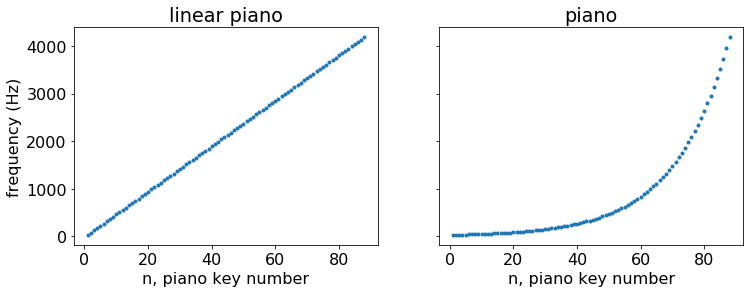

In [170]:
x = np.arange(1, 89)

fig, ax =  plt.subplots(1, 2, figsize=(12, 4), sharey=True)

y = lin_piano_ky2fr_fun(x)
ax[0].plot(x, y, '.')
ax[0].set_xlabel('n, piano key number')
ax[0].set_ylabel('frequency (Hz)')
ax[0].set_title('linear piano')

y = piano_ky2fr_fun(x)
ax[1].plot(x, y, '.')
ax[1].set_xlabel('n, piano key number')
ax[1].set_title('piano')

**Figure 3: Frequencies of the piano keys assuming a linear and an exponential model.**

Intervals between consecutive notes with a the linear and the exponential model.

In [129]:
i = 2
fLp0 = lin_piano_ky2fr_fun(i-1)
fp0 = lin_piano_ky2fr_fun(i-1)

print("n\tF_L(n)\tD F_L\t\tF(n)\tD F\tFn/Fn-1\n"\
     "---------------------------------------------------")


for i in np.arange(i, 10):
    fLp = lin_piano_ky2fr_fun(i)
    fp = piano_ky2fr_fun(i)
    print("{}\t{:.1f}\t{:.1f}\t\t{:.1f}\t{:.1f}\t{:.1f}".format(i, fLp, fLp - fLp0, fp, fp - fp0, fp/fp0))
    fLp0 = fLp
    fp0 = fp

n	F_L(n)	D F_L		F(n)	D F	Fn/Fn-1
---------------------------------------------------
2	75.3	47.8		29.1	1.6	1.1
3	123.1	47.8		30.9	1.7	1.1
4	170.9	47.8		32.7	1.8	1.1
5	218.7	47.8		34.6	1.9	1.1
6	266.5	47.8		36.7	2.1	1.1
7	314.3	47.8		38.9	2.2	1.1
8	362.1	47.8		41.2	2.3	1.1
9	409.9	47.8		43.7	2.5	1.1


Every time we advance one key we multiply the frequency by $1.06$, $f(n+1) = f(n) \times b$

$f(n + m) = f(n) b^{m}$

## Exponential growth and logarithmic growth are two faces of the same coin

An exponential model $y=a b^x$ says that $y$ grows exponentially with $x$. 

Now we can ask, how does $x$ grows with $y$ . 

Translating this into musical notes, would allow us to address the question: which is the piano note that produces the frequency $f$  so $k(f)$?

For that we just need to flip our graph. 

To figure out the function that describes this curve, can isolate x from $y = a b^x$ by taking the logarithm
$$
\log_b (y) = \log_b(ab^x) \\= x log_b(b) + \log_b(a) \\x = \log_b(y) - \log_b(a) \\
$$
If $a=1$ then $x = log_b(y)$ otherwise $x = \log_b(y) + c $

Summarising, if $y$ depends exponentially on $x$ then $x$ depends logarithmically on $y$. 

If a variable depends exponentially to another one, the other one depends logarithmically to the first one. 

In a way exponents and logarithms are the same. They are just two different ways of describing the same  relation, but form two different perspectives.

$f(x) = \log_b(x)$ From the perspective of the exponent, to what power do I have to raise the basis $b$ to get $x$?

$g(y) = b^y$ From the perspective of a peer, what is $b$ to the power of $x$?

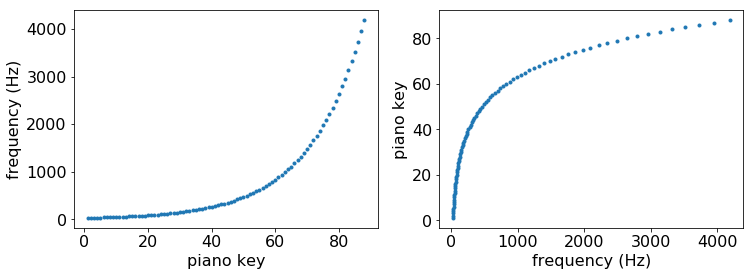

In [172]:
x = np.arange(1, 89)

fig, ax =  plt.subplots(1, 2, figsize=(12, 4))

y = piano_ky2fr_fun(x)
ax[0].plot(x, y, '.')
ax[0].set_xlabel('piano key')
ax[0].set_ylabel('frequency (Hz)')

y = piano_ky2fr_fun(x)
ax[1].plot(y, x, '.')
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('piano key')

fig.savefig(os.path.join(outFigDir,'freqs_notes_log_exp.png'), 
            bbox_inches='tight')

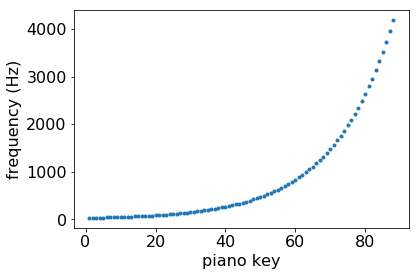

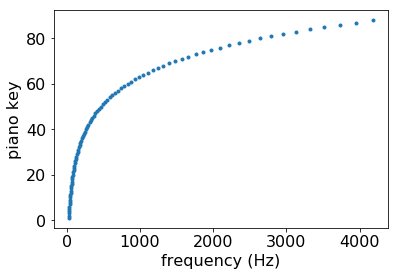

In [175]:
x = np.arange(1, 89)

fig, ax =  plt.subplots()

y = piano_ky2fr_fun(x)
ax.plot(x, y, '.')
ax.set_xlabel('piano key')
ax.set_ylabel('frequency (Hz)')
fig.savefig(os.path.join(outFigDir, 'freqs_notes_exp.png'), 
            bbox_inches='tight')

fig, ax =  plt.subplots()

y = piano_ky2fr_fun(x)
ax.plot(y, x, '.')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('piano key')
fig.savefig(os.path.join(outFigDir, 'freqs_notes_log.png'), 
            bbox_inches='tight')

## Other examples of exponential/logarithmic growth

This is the same type of growth underneath the spread of COVID-19.

Piano keys $n$ and $m$ $\rightarrow$ days $d$

Key frequency $f(n) \, \rightarrow \, N(d)$ is the number of cases on day $d$

$b$ Frequency increase $\rightarrow$ $R$ infection rate.

You can dig deeper in this [notebook](https://github.com/floreencia/pandemic/blob/master/COVID-19.ipynb)


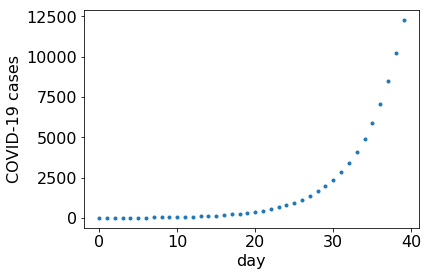

In [174]:
x = np.arange(40)
R = 1.2
d0 = 10
y = d0*R**(x)

fig, ax =  plt.subplots()#1, 1, figsize=(12, 4))

ax.plot(x, y, '.')
ax.set_xlabel('day')
ax.set_ylabel('COVID-19 cases')

fig.savefig(os.path.join(outFigDir, 'log_exp_plots_covid.png'), 
            bbox_inches='tight')

## Binry search

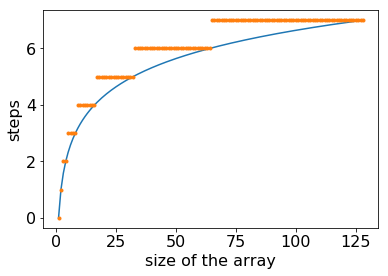

In [177]:
x = np.arange(1, 129)
y = np.log2(x)
yd = np.ceil(np.log2(x))

fig, ax =  plt.subplots()#1, 1, figsize=(12, 4))

ax.plot(x, y)
ax.plot(x, yd, '.')
ax.set_xlabel('size of the array')
ax.set_ylabel('steps')

fig.savefig(os.path.join(outFigDir, 'log_exp_plots_binarySearch.png'), 
            bbox_inches='tight')

## Harmonics

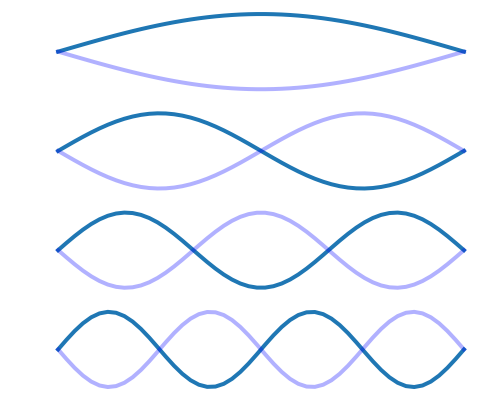

In [176]:
f0 = 1
t = np.linspace(0, np.pi)
N = 5
fig, ax = plt.subplots(N-1, figsize=(8,7))


for i in np.arange(1, N):
    f = f0*i
    y = np.sin(t*f)
    ax[i-1].plot(t, y, lw=4)
    ax[i-1].plot(t, -y, c='b', alpha=0.3, lw=4)
    ax[i-1].set_ylim(-1.1,1.1)
    ax[i-1].axis('off')

fig.savefig(os.path.join(outFigDir, 'harmonic_wave.png'), 
            bbox_inches='tight')
    